# パッケージのインポート

In [18]:
import matplotlib.pylab as plt
import numpy as np
import numpy.typing as npt

# Chapter2 　パーセプトロンの実装


In [19]:


def AND(x1: int, x2: int):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    return 1 if tmp > 0 else 0


assert AND(0, 0) == 0
assert AND(0, 1) == 0
assert AND(1, 0) == 0
assert AND(1, 1) == 1

In [20]:
def NAND(x1: int, x2: int):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x * w) + b
    return 1 if tmp > 0 else 0


assert NAND(0, 0) == 1
assert NAND(0, 1) == 1
assert NAND(1, 0) == 1
assert NAND(1, 1) == 0


In [21]:
def OR(x1: int, x2: int):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x * w) + b
    return 1 if tmp > 0 else 0


assert OR(0, 0) == 0
assert OR(0, 1) == 1
assert OR(1, 0) == 1
assert OR(1, 1) == 1

In [22]:
def XOR(x1: int, x2: int):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


assert XOR(0, 0) == 0
assert XOR(0, 1) == 1
assert XOR(1, 0) == 1
assert XOR(1, 1) == 0


# Chapter3 ニューラルネットワーク


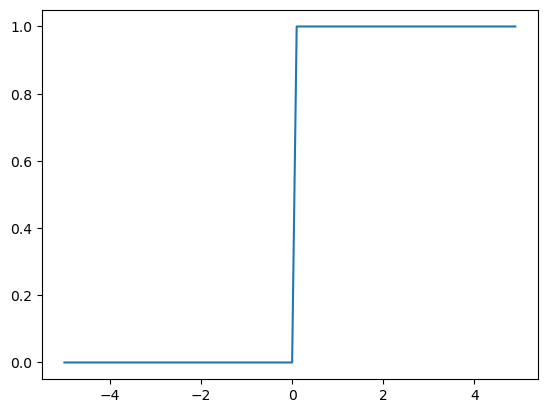

In [23]:



def step_function(x: npt.NDArray):
    return np.array(x > 0, dtype=int)


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

In [46]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [45]:
def relu(x:int):
  return np.maximum(0,x)
  
  


## 多次元配列、行列


In [26]:
A = np.array([1,2,3,4])
print(A)


[1 2 3 4]


In [27]:
np.ndim(A)

1

In [28]:
A.shape

(4,)

In [29]:
A.shape[0]

4

In [31]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [33]:
print("dim:",np.ndim(B))
print("Shape:",B.shape)

dim: 2
Shape: (3, 2)


In [36]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print("AとBの積:" ,np.dot(A,B))


AとBの積: [[19 22]
 [43 50]]


In [37]:
A = np.array([[1,2],[3,4],[5,6]])
# １次元の配列を渡すと[[7],[8]]みたいなイメージかな
B = np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

ニューラルネットワークの計算を行列で行う

In [43]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print("y1:{} y2:{} y3{}".format(*Y))


y1:5 y2:11 y317


各層における信号伝達の実装

In [50]:
# 0→1層の実装
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1) + B1
# 活性化関数としてシグモイド関数を使用。
Z1 = sigmoid(A1)
print(A1)
print(Z1)


[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [52]:
# 1→2層の実装
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2 # 1層目からの出力をを入力としている点が先ほどと異なる
Z2 = sigmoid(A2)
print("A2",A2)
print("Z2",Z2)


A2 [0.51615984 1.21402696]
Z2 [0.62624937 0.7710107 ]


In [53]:
# 出力層への実装
def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # 活性化関数に恒等関数を使用。出力層ではシグモイド関数は使わない。


## 出力層の設計


In [ ]:
def softmax(a):
  c = np.max(a) # オーバーフロー対策
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
